# Leaner Regression Model

## Overview
This is my first machine learning model, named "Leaner Regression." The goal of this project is to build a simple linear regression model from scratch to understand the fundamental concepts of machine learning. The model will predict a continuous target variable based on one or more input features.

## Objectives
- Implement a linear regression model using basic Python and NumPy.
- Understand the mathematics behind linear regression, including the cost function and gradient descent.
- Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared.
- Visualize the results to gain insights into the model's predictions.

## Steps
1. **Data Preparation**: Load and preprocess the dataset.
2. **Model Implementation**: Define the linear regression model, including the hypothesis function, cost function, and gradient descent algorithm.
3. **Training**: Train the model on the training dataset.
4. **Evaluation**: Evaluate the model's performance on the test dataset.
5. **Visualization**: Plot the regression line and compare it with the actual data points.

## Dependencies
- Python 3.11.11
- NumPy
- Matplotlib
- Scikit-learn (for dataset splitting and evaluation)

## Usage
To run the model, simply execute each cell in the notebook sequentially. The final cell will output the model's performance metrics and visualization.

## Future Improvements
- Implement multiple linear regression.
- Add regularization techniques (e.g., L1/L2 regularization).
- Experiment with different optimization algorithms (e.g., Stochastic Gradient Descent).

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## Cost Function for Linear Regression

This cell defines the `compute_cost` function, which calculates the cost (or error) for a linear regression model.

### Formula:
The cost function for linear regression is given by:

\[
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2
\]

Where:
- \( m \): Number of training examples.
- \( f_{w,b}(x^{(i)}) = wx^{(i)} + b \): Predicted value for the \( i \)-th example.
- \( y^{(i)} \): Actual value for the \( i \)-th example.
- \( J(w, b) \): Cost (mean squared error scaled by \( \frac{1}{2m} \)).

### Parameters:
- `x`: Input features (independent variable), as a NumPy array or list.
- `y`: Target values (dependent variable), as a NumPy array or list.
- `w`: Weight (slope of the line).
- `b`: Bias (intercept of the line).

### Returns:
- `total_cost`: The computed cost (a scalar value).

In [63]:
def compute_cost (x,y,w,b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    f_wb = w * x[i] + b
    cost += (f_wb - y[i])**2
  total_cost = 1/(2*m) * cost
  return total_cost

## Gradient Computation for Linear Regression

This cell defines the `compute_gradient` function, which calculates the gradients of the cost function with respect to the weight (`w`) and bias (`b`) for linear regression.

### Formula:
The gradients are computed as:

\[
\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)}) \cdot x^{(i)}
\]

\[
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})
\]

Where:
- \( m \): Number of training examples.
- \( f_{w,b}(x^{(i)}) = wx^{(i)} + b \): Predicted value for the \( i \)-th example.
- \( y^{(i)} \): Actual value for the \( i \)-th example.

### Parameters:
- `x`: Input features (independent variable), as a NumPy array or list.
- `y`: Target values (dependent variable), as a NumPy array or list.
- `w`: Weight (slope of the line).
- `b`: Bias (intercept of the line).

### Returns:
- `w_gradient`: Gradient of the cost function with respect to `w`.
- `b_gradient`: Gradient of the cost function with respect to `b`.

In [64]:
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  w_gradient = 0
  b_gradient = 0
  for i in range (m):
    f_wb = w * x[i] + b
    w_gradient +=  (f_wb - y[i] )* x[i]
    b_gradient += (f_wb - y[i])
  w_gradient /= m
  b_gradient /= m
  return w_gradient, b_gradient

## Gradient Descent for Linear Regression

This cell defines the `gradient_descent` function, which performs gradient descent to optimize the parameters (`w`, `b`) for linear regression.

### Algorithm:
1. Initialize `w` and `b`.
2. For each iteration:
   - Compute the gradients using `compute_gradient`.
   - Update `w` and `b` using the learning rate `alpha`.
   - Store the cost and parameter history.
   - Print progress every `n` iterations.

### Parameters:
- `x`: Input features (independent variable), as a NumPy array or list.
- `y`: Target values (dependent variable), as a NumPy array or list.
- `w_in`: Initial weight (slope of the line).
- `b_in`: Initial bias (intercept of the line).
- `alpha`: Learning rate.
- `iterations`: Number of iterations to run gradient descent.
- `compute_cost`: Function to compute the cost.
- `compute_gradient`: Function to compute the gradients.

### Returns:
- `w`: Optimized weight.
- `b`: Optimized bias.
- `j_wb_history`: History of cost values.
- `wb_history`: History of weight and bias values.


In [65]:
def gradient_descent(x , y , w_in , b_in , alpha , iterations , compute_cost , compute_gradient):
    w = w_in
    b = b_in
    j_wb_history = []
    wb_history = []

    for i in range(iterations):
        # Compute gradients
        w_gradient, b_gradient = compute_gradient(x, y, w, b)

        # Update parameters
        w = w - alpha * w_gradient
        b = b - alpha * b_gradient

        # Store history
        j_wb_history.append(compute_cost(x, y, w, b))
        wb_history.append([w, b])

        # Print progress
        if i % math.ceil(iterations / 10) == 0:
            print(f"Iteration {i}: Cost {j_wb_history[-1]}, "
                  f"w_gradient: {w_gradient}, b_gradient: {b_gradient}, "
                  f"w: {wb_history[-1][0]}, b: {wb_history[-1][1]}")

    return w, b, j_wb_history, wb_history

## Generate Synthetic Regression Dataset

In this cell, we generate a synthetic regression dataset using `make_regression` from `sklearn.datasets`. This dataset will be used to test our machine learning model.

### Steps:
1. **Generate Dataset**:
   - We use `make_regression` to create a dataset with:
     - `n_samples=1000`: 1000 samples (rows).
     - `n_features=3`: 3 features (independent variables).
     - `noise=25`: Adds Gaussian noise with a standard deviation of 25 to the target variable to simulate real-world variability.
     - `random_state=42`: Ensures reproducibility by fixing the random seed.

2. **Convert to DataFrame**:
   - The dataset is converted into a Pandas DataFrame for easier manipulation and visualization.
   - The features are named `x1`, `x2`, and `x3`, and the target variable is named `y`.

3. **Display the First Few Rows**:
   - We use `df.head()` to display the first 5 rows of the DataFrame to inspect the data.

### Why Use This Dataset?
- **Controlled Environment**: Synthetic datasets allow us to control the complexity and noise level, making it easier to test and debug models.
- **Understanding Relationships**: By visualizing the relationship between features and the target, we can better understand how our model performs.


In [66]:
X, y = make_regression(n_samples=1000, n_features=3, noise=25, random_state=42)

## Split Dataset into Training and Testing Sets

In this cell, we split the dataset into training and testing sets for each feature (`x1`, `x2`, `x3`) individually. This allows us to test the performance of our model on each feature separately.
### Why Split by Feature?
- **Feature-Specific Analysis**: By splitting each feature individually, we can analyze how each feature contributes to the model's performance.
- **Simplified Testing**: This approach allows us to test simple models (e.g., univariate linear regression) for each feature before moving to more complex models.

In [67]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X[:, 0], y, test_size=0.2, random_state=42)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X[:, 1], y, test_size=0.2, random_state=42)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X[:, 2], y, test_size=0.2, random_state=42)

# **Training Model And Anlysis**
Perform gradient descent to optimize the linear regression model parameters (`w`, `b`).
Visualize the training data, regression line, cost function convergence, and parameter updates over iterations.

In [84]:
W_in = 0
b_in = 0
alpha = 8.0e-1
iterations = 100
w_final_1, b_final_1, J_hist_1, p_hist_1 = gradient_descent(x_train_1 ,y_train_1, W_in, b_in , alpha ,
                                                    iterations , compute_cost , compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final_1} , {b_final_1})")
print(f"cost found by gradient descent : {J_hist_1[-1]}")

Iteration 0: Cost 36.40142828224554, w_gradient: -96.57004794435359, b_gradient: -0.8432897395911827, w: 77.25603835548287, b: 0.6746317916729462
Iteration 10: Cost 35.62884134762748, w_gradient: -9.026525343176495e-06, b_gradient: -8.748845301198572e-06, w: 95.31204891407901, b: 3.203869795740569
Iteration 20: Cost 35.628841356555945, w_gradient: -1.627609158560972e-12, b_gradient: -2.061915083118038e-12, w: 95.31205081368347, b: 3.203871771403549
Iteration 30: Cost 35.62884135655592, w_gradient: -8.943956686380261e-15, b_gradient: -1.1990408665951691e-15, w: 95.31205081368383, b: 3.203871771404002
Iteration 40: Cost 35.62884135655592, w_gradient: -8.943956686380261e-15, b_gradient: -1.1990408665951691e-15, w: 95.31205081368383, b: 3.203871771404002
Iteration 50: Cost 35.62884135655592, w_gradient: -8.943956686380261e-15, b_gradient: -1.1990408665951691e-15, w: 95.31205081368383, b: 3.203871771404002
Iteration 60: Cost 35.62884135655592, w_gradient: -8.943956686380261e-15, b_gradient:

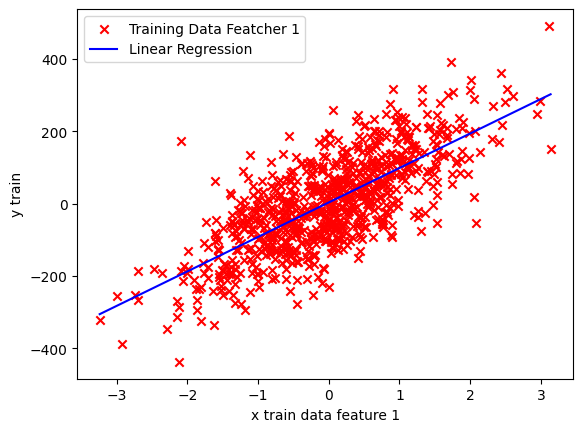

In [69]:
plt.scatter(x_train_1 , y_train_1,label="Training Data Featcher 1", color="red", marker="x")
x_line = np.array([np.min(x_train_1), np.max(x_train_1)])
y_line = w_final_1 * x_line + b_final_1
plt.plot(x_line , y_line , label="Linear Regression", color="blue")

plt.xlabel ("x train data feature 1")
plt.ylabel("y train")
plt.legend()
plt.show()

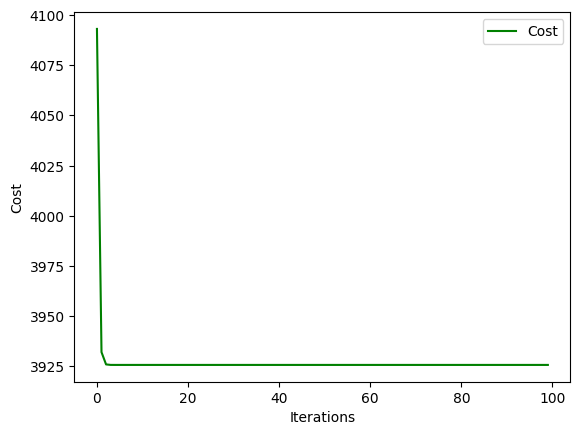

In [70]:
plt.plot(J_hist_1, label="Cost" , color = "green" )
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

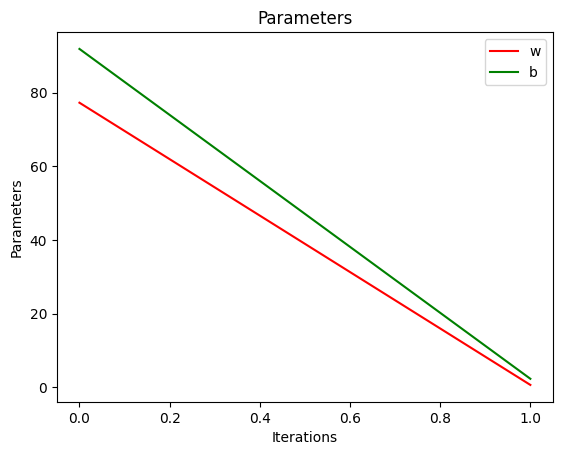

In [71]:
plt.plot(p_hist_1[0] , label="w" , color = "red" )
plt.plot(p_hist_1[1] , label="b" , color = "green" )
plt.title("Parameters")
plt.xlabel("Iterations")
plt.ylabel("Parameters")
plt.legend()
plt.show()

In [85]:
W_in = 0
b_in = 0
alpha = 6.0e-1
iterations = 1000
w_final_2, b_final_2, J_hist_2, p_hist_2 = gradient_descent(x_train_2 ,y_train_2, W_in, b_in , alpha ,
                                                    iterations , compute_cost , compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final_2} , {b_final_2})")
print(f"cost found by gradient descent : {J_hist_2[-1]}")

Iteration 0: Cost 44.16256032734578, w_gradient: -73.86321763772213, b_gradient: -0.8432897395911827, w: 44.317930582633274, b: 0.5059738437547096
Iteration 100: Cost 42.30038623174488, w_gradient: -5.17363929475323e-16, b_gradient: -8.881784197001253e-17, w: 78.526111986787, b: -3.0286120853946707
Iteration 200: Cost 42.30038623174488, w_gradient: -5.17363929475323e-16, b_gradient: -8.881784197001253e-17, w: 78.526111986787, b: -3.0286120853946707
Iteration 300: Cost 42.30038623174488, w_gradient: -5.17363929475323e-16, b_gradient: -8.881784197001253e-17, w: 78.526111986787, b: -3.0286120853946707
Iteration 400: Cost 42.30038623174488, w_gradient: -5.17363929475323e-16, b_gradient: -8.881784197001253e-17, w: 78.526111986787, b: -3.0286120853946707
Iteration 500: Cost 42.30038623174488, w_gradient: -5.17363929475323e-16, b_gradient: -8.881784197001253e-17, w: 78.526111986787, b: -3.0286120853946707
Iteration 600: Cost 42.30038623174488, w_gradient: -5.17363929475323e-16, b_gradient: -8

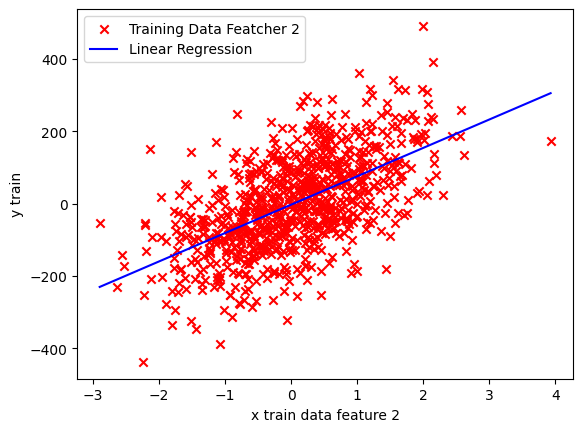

In [74]:
plt.scatter(x_train_2 , y_train_2,label="Training Data Featcher 2", color="red", marker="x")
x_line = np.array([np.min(x_train_2), np.max(x_train_2)])
y_line = w_final_2 * x_line + b_final_2
plt.plot(x_line , y_line , label="Linear Regression", color="blue")

plt.xlabel ("x train data feature 2")
plt.ylabel("y train")
plt.legend()
plt.show()

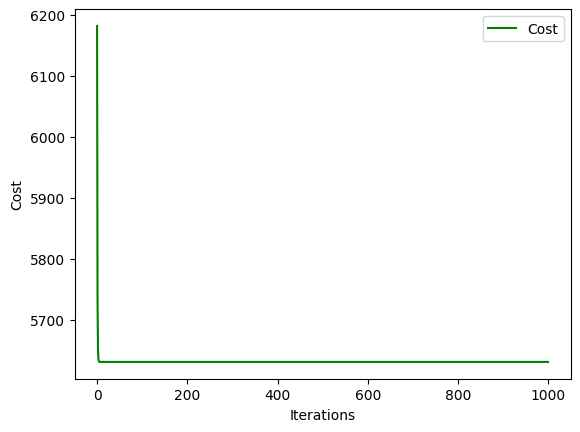

In [75]:
plt.plot(J_hist_2, label="Cost" , color = "green" )
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

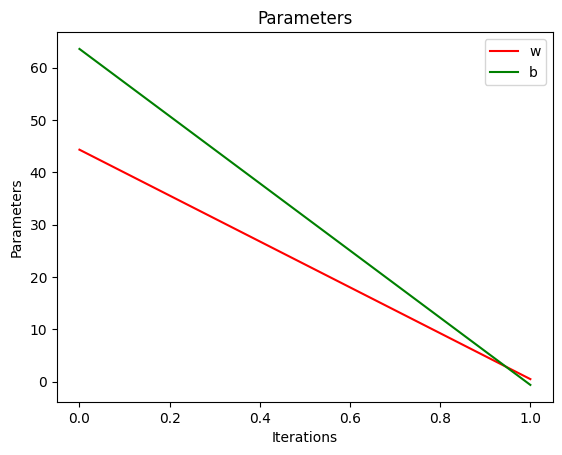

In [80]:
plt.plot(p_hist_2[0] , label="w" , color = "red" )
plt.plot(p_hist_2[1] , label="b" , color = "green" )
plt.title("Parameters")
plt.xlabel("Iterations")
plt.ylabel("Parameters")
plt.legend()
plt.show()

In [76]:
W_in = 0
b_in = 0
alpha = 6.0e-1
iterations = 10
w_final_3, b_final_3, J_hist_3, p_hist_3 = gradient_descent(x_train_3 ,y_train_3, W_in, b_in , alpha ,
                                                    iterations , compute_cost , compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final_3} , {b_final_3})")
print(f"cost found by gradient descent : {J_hist_3[-1]}")

Iteration 0: Cost 8210.023820984668, w_gradient: -27.200876388283238, b_gradient: -0.8432897395911827, w: 16.320525832969942, b: 0.5059738437547096
Iteration 1: Cost 8149.14206548467, w_gradient: -11.882908954348716, b_gradient: -0.19008950154096335, w: 23.45027120557917, b: 0.6200275446792876
Iteration 2: Cost 8137.520430886602, w_gradient: -5.192103917787526, b_gradient: -0.01171883471728096, w: 26.565533556251687, b: 0.6270588455096562
Iteration 3: Cost 8135.300495719583, w_gradient: -2.2690177532923372, b_gradient: 0.023415043681232123, w: 27.926944208227088, b: 0.6130098193009169
Iteration 4: Cost 8134.876209714793, w_gradient: -0.9917450788120774, b_gradient: 0.02164721377077795, w: 28.521991255514333, b: 0.6000214910384501
Iteration 5: Cost 8134.7950795599345, w_gradient: -0.4335349357436865, b_gradient: 0.01402676593721882, w: 28.782112216960545, b: 0.5916054314761189
Iteration 6: Cost 8134.779560073781, w_gradient: -0.18954169030151205, b_gradient: 0.007957240526190023, w: 28.

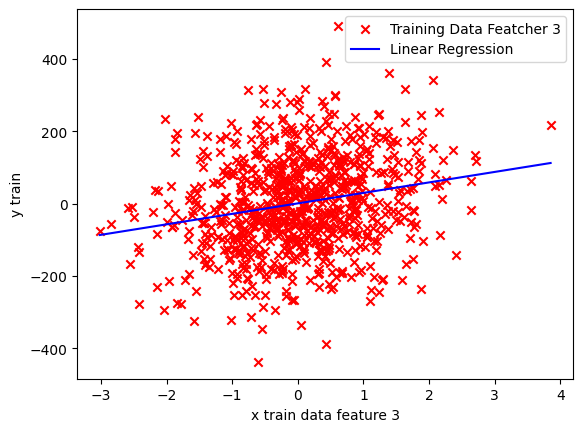

In [77]:
plt.scatter(x_train_3 , y_train_3,label="Training Data Featcher 3", color="red", marker="x")
x_line = np.array([np.min(x_train_3), np.max(x_train_3)])
y_line = w_final_3 * x_line + b_final_3
plt.plot(x_line , y_line , label="Linear Regression", color="blue")

plt.xlabel ("x train data feature 3")
plt.ylabel("y train")
plt.legend()
plt.show()

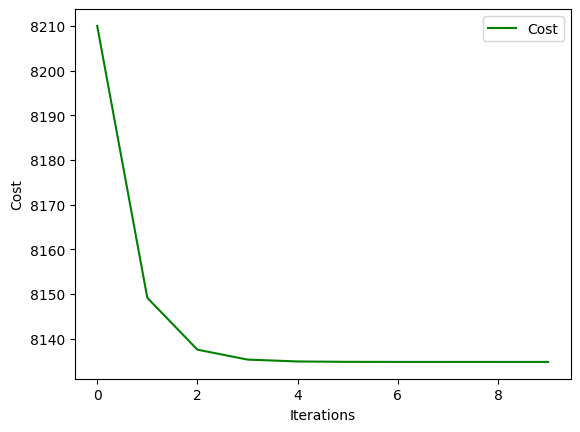

In [78]:
plt.plot(J_hist_3, label="Cost" , color = "green" )
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

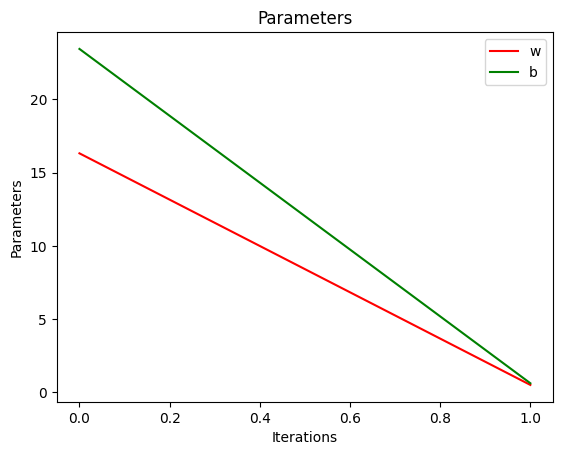

In [81]:
plt.plot(p_hist_3[0] , label="w" , color = "red" )
plt.plot(p_hist_3[1] , label="b" , color = "green" )
plt.title("Parameters")
plt.xlabel("Iterations")
plt.ylabel("Parameters")
plt.legend()
plt.show()